<a href="https://colab.research.google.com/github/henryonomakpo/The-Impact-of-ESG-Ratings-on-EV-Manufacturing-Industry/blob/main/Aquaculture_Fresh_Water_Fish_Diseases.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install torchmetrics
!pip install torchinfo

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 868.8/868.8 kB 5.0 MB/s eta 0:00:00
  Using cached nvidia_cuda_nvrtc_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (23.7 MB)
  Using cached nvidia_cuda_runtime_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (823 kB)
  Using cached nvidia_cuda_cupti_cu12-12.1.105-py3-none-manylinux1_x86_64.whl (14.1 MB)
  Using cached nvidia_cudnn_cu12-8.9.2.26-py3-none-manylinux1_x86_64.whl (731.7 MB)
  Using cached nvidia_cublas_cu12-12.1.3.1-py3-none-manylinux1_x86_64.whl (410.6 MB)
  Using cached nvidia_cufft_cu12-11.0.2.54-py3-none-manylinux1_x86_64.whl (121.6 MB)
  Using cached nvidia_curand_cu12-10.3.2.106-py3-none-manylinux1_x86_64.whl (56.5 MB)
  Using cached nvidia_cusolver_cu12-11.4.5.107-py3-none-manylinux1_x86_64.whl (124.2 MB)
  Using cached nvidia_cusparse_cu12-12.1.0.106-py3-none-manylinux1_x86_64.whl (196.0 MB)
  Using cached nvidia_nccl_cu12-2.20.5-py3-none-manylinux2014_x86_64.whl (176.2 MB)
  Using cached nvidia_nvtx_cu12-12.1.105-py3-none-m

In [ ]:
# Import libraries

# Data handling
import pandas as pd
import numpy as np

# Data Visualization
import matplotlib.pyplot as plt
import seaborn as sns
from PIL import Image

# Preprocessing
import cv2
from sklearn.model_selection import train_test_split as tts

# Torch
import torch
from torch import nn, optim
from torch.utils.data import Dataset, DataLoader
from torchinfo import summary
from torchmetrics.classification import MulticlassAccuracy
from torchvision.models import resnet50, ResNet50_Weights

# Metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, classification_report

# os
import os

# Path
from pathlib import Path

# tqdm
from tqdm.auto import tqdm

# typing
from typing import Dict, List

# Counter
from collections import Counter

# random
import random

# Warnings
import warnings
warnings.filterwarnings('ignore')


In [ ]:

import zipfile

with zipfile.ZipFile("/content/archiveAquaFish.zip", mode="r") as archive:
  archive.printdir()




File Name                                             Modified             Size
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpeg 2024-03-26 06:37:34        22771
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).jpg 2024-03-26 06:37:34        17320
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (1).png 2024-03-26 06:37:34        90838
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (10).jpg 2024-03-26 06:37:34        12494
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (11).jpg 2024-03-26 06:37:34        18900
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red disease/Bacterial Red disease (116).jpg 2024-03-26 06:37:34         2938
Freshwater Fish Disease Aquaculture in south asia/Test/Bacterial Red diseas

In [ ]:
!zip -r '/content/archiveAquaFish.zip"' '/content/folder/"OrginalFileName"'

	zip warning: name not matched: /content/folder/"OrginalFileName"

zip error: Nothing to do! (try: zip -r /content/archiveAquaFish.zip" . -i /content/folder/"OrginalFileName")


In [ ]:
import os

# Replace '/content/' with the correct directory path
directory = '/content/'

# Let's visualize how many classes we have.
classes = sorted(os.listdir(directory))
classes

['.config',
 'Aquculture_Fish_Disease.csv',
 'Bacterial Red disease (1).jpeg',
 'Bacterial Red disease (1).jpg',
 'Bacterial Red disease (1).png',
 'Bacterial Red disease (10).jpg',
 'Bacterial Red disease (100).jpg',
 'Bacterial Red disease (101).jpg',
 'Bacterial Red disease (102).jpg',
 'Bacterial Red disease (103).jpg',
 'Bacterial Red disease (104).jpg',
 'Bacterial Red disease (105).jpg',
 'Bacterial Red disease (106).jpg',
 'Bacterial Red disease (107).jpg',
 'Bacterial Red disease (108).jpg',
 'Bacterial Red disease (109).jpg',
 'Bacterial Red disease (11).jpg',
 'Bacterial Red disease (110).jpg',
 'Bacterial Red disease (111).jpg',
 'Bacterial Red disease (112).jpg',
 'Bacterial Red disease (113).jpg',
 'Bacterial Red disease (114).jpg',
 'Bacterial Red disease (115).jpg',
 'Bacterial Red disease (116).jpg',
 'Bacterial Red disease (117).jpg',
 'Bacterial Red disease (118).jpg',
 'Bacterial Red disease (119).jpg',
 'Bacterial Red disease (12).jpg',
 'Bacterial Red disease (120

In [ ]:
import os
from pathlib import Path

# Replace '/content/' with the correct directory path
directory = '/content/'

# Set the image directory path
IMAGE_PATH = Path(directory)

# Get a list of image file paths
image_path_list_jpg = list(IMAGE_PATH.glob("**/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("**/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("**/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("**/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("**/*.webp"))

# Combine all the image file paths
TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png \
                        + image_path_list_JPG + image_path_list_webp

# Print the total number of images
print(f'Total Images = {len(TOTAL_IMAGE_PATH_LIST)}')

Total Images = 1150


In [ ]:
# Let's visualize how many classes we have.
classes = sorted(os.listdir(IMAGE_PATH))
classes

['.config',
 'Aquculture_Fish_Disease.csv',
 'Bacterial Red disease (1).jpeg',
 'Bacterial Red disease (1).jpg',
 'Bacterial Red disease (1).png',
 'Bacterial Red disease (10).jpg',
 'Bacterial Red disease (100).jpg',
 'Bacterial Red disease (101).jpg',
 'Bacterial Red disease (102).jpg',
 'Bacterial Red disease (103).jpg',
 'Bacterial Red disease (104).jpg',
 'Bacterial Red disease (105).jpg',
 'Bacterial Red disease (106).jpg',
 'Bacterial Red disease (107).jpg',
 'Bacterial Red disease (108).jpg',
 'Bacterial Red disease (109).jpg',
 'Bacterial Red disease (11).jpg',
 'Bacterial Red disease (110).jpg',
 'Bacterial Red disease (111).jpg',
 'Bacterial Red disease (112).jpg',
 'Bacterial Red disease (113).jpg',
 'Bacterial Red disease (114).jpg',
 'Bacterial Red disease (115).jpg',
 'Bacterial Red disease (116).jpg',
 'Bacterial Red disease (117).jpg',
 'Bacterial Red disease (118).jpg',
 'Bacterial Red disease (119).jpg',
 'Bacterial Red disease (12).jpg',
 'Bacterial Red disease (120

In [ ]:
# Let's see how many images per class we have.
class_count = []
for i in TOTAL_IMAGE_PATH_LIST:
    class_count.append(i.parent.stem)

Counter(class_count)

Counter({'content': 1150})

In [ ]:
# Let's visualize how many classes we have.
classes = sorted(os.listdir(IMAGE_PATH))
classes

['.config',
 'Aquculture_Fish_Disease.csv',
 'Bacterial Red disease (1).jpeg',
 'Bacterial Red disease (1).jpg',
 'Bacterial Red disease (1).png',
 'Bacterial Red disease (10).jpg',
 'Bacterial Red disease (100).jpg',
 'Bacterial Red disease (101).jpg',
 'Bacterial Red disease (102).jpg',
 'Bacterial Red disease (103).jpg',
 'Bacterial Red disease (104).jpg',
 'Bacterial Red disease (105).jpg',
 'Bacterial Red disease (106).jpg',
 'Bacterial Red disease (107).jpg',
 'Bacterial Red disease (108).jpg',
 'Bacterial Red disease (109).jpg',
 'Bacterial Red disease (11).jpg',
 'Bacterial Red disease (110).jpg',
 'Bacterial Red disease (111).jpg',
 'Bacterial Red disease (112).jpg',
 'Bacterial Red disease (113).jpg',
 'Bacterial Red disease (114).jpg',
 'Bacterial Red disease (115).jpg',
 'Bacterial Red disease (116).jpg',
 'Bacterial Red disease (117).jpg',
 'Bacterial Red disease (118).jpg',
 'Bacterial Red disease (119).jpg',
 'Bacterial Red disease (12).jpg',
 'Bacterial Red disease (120

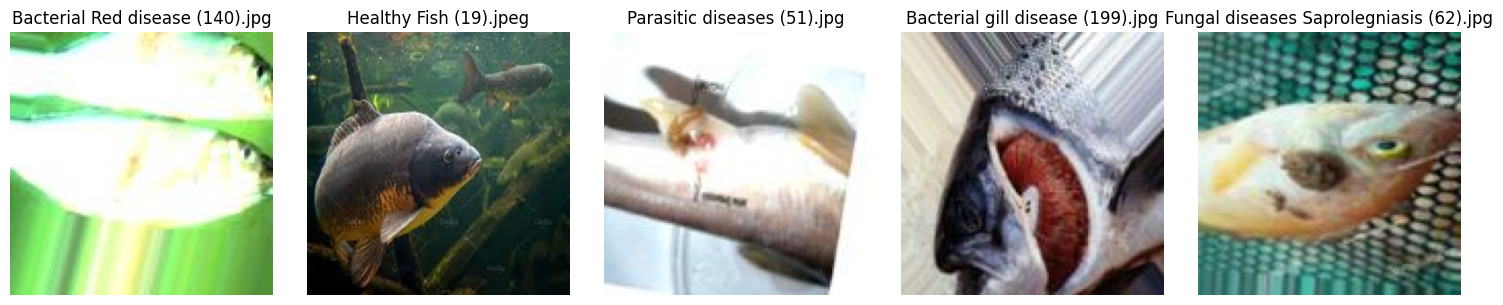

In [ ]:
import os
import random
from pathlib import Path
import matplotlib.pyplot as plt
from PIL import Image

# Replace '/content/' with the correct directory path
directory = '/content/'

# Set the image directory path
IMAGE_PATH = Path(directory)

# Get a list of image file paths
image_path_list_jpg = list(IMAGE_PATH.glob("**/*.jpg"))
image_path_list_jpeg = list(IMAGE_PATH.glob("**/*.jpeg"))
image_path_list_png = list(IMAGE_PATH.glob("**/*.png"))
image_path_list_JPG = list(IMAGE_PATH.glob("**/*.JPG"))
image_path_list_webp = list(IMAGE_PATH.glob("**/*.webp"))

# Combine all the image file paths
TOTAL_IMAGE_PATH_LIST = image_path_list_jpg + image_path_list_jpeg + image_path_list_png \
                        + image_path_list_JPG + image_path_list_webp

# Select 5 random images
sample_images = random.sample(TOTAL_IMAGE_PATH_LIST, k=5)

# Create a figure and axes for image display
fig, ax = plt.subplots(nrows=1, ncols=5, figsize=(15, 3))

# Display each image
for i, image_path in enumerate(sample_images):
    try:
        img = Image.open(image_path)
        ax[i].imshow(img)
        ax[i].set_title(image_path.name)
        ax[i].axis('off')
    except Exception as e:
        print(f"Error processing image: {image_path}\n{str(e)}")

plt.tight_layout()
plt.show()

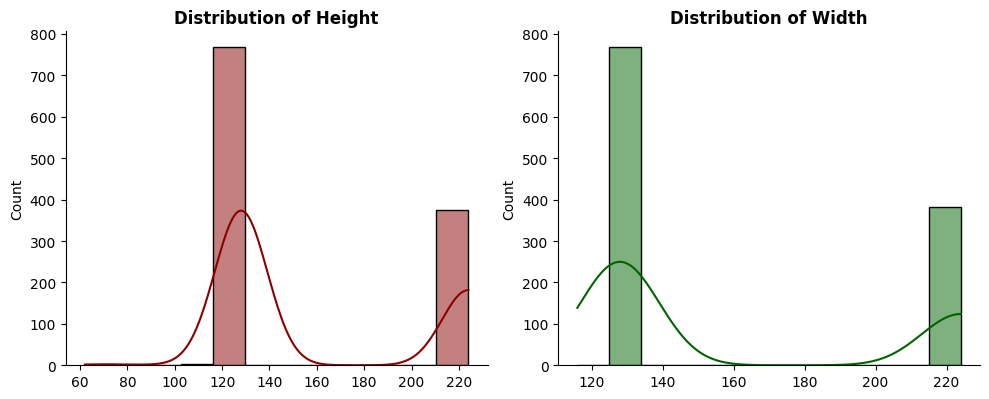

In [ ]:
seq_height = []
seq_width = []

for i in TOTAL_IMAGE_PATH_LIST:
    img_BGR = cv2.imread(str(i))
    img_RGB = cv2.cvtColor(img_BGR, cv2.COLOR_BGR2RGB)
    seq_height.append(img_RGB.shape[0])
    seq_width.append(img_RGB.shape[1])

fig, ax = plt.subplots(nrows = 1, ncols = 2, figsize = (10,4.1))
ax = ax.flat

sns.histplot(seq_height, kde = True, color = 'darkred', ax = ax[0])
ax[0].spines['top'].set_visible(False)
ax[0].spines['right'].set_visible(False)
ax[0].set_title('Distribution of Height', fontweight = 'bold', color = 'black')

sns.histplot(seq_width, kde = True, color = 'darkgreen', ax = ax[1])
ax[1].spines['top'].set_visible(False)
ax[1].spines['right'].set_visible(False)
ax[1].set_title('Distribution of Width', fontweight = 'bold', color = 'black')

fig.tight_layout()
fig.show()


In [ ]:
df_height_width = pd.DataFrame({'height':seq_height, 'width':seq_width})

df_height_width.describe().T

,count,mean,std,min,25%,50%,75%,max
height,1150.0,158.903478,45.362924,62.0,128.0,128.0,224.0,224.0
width,1150.0,159.794783,45.213887,116.0,128.0,128.0,224.0,224.0


In [ ]:
# Let's create our pd.DataFrame to store the path of the images and their respective label.
img_path_and_label = {'img_path':[],
                      'label':[]}

for img_pth in TOTAL_IMAGE_PATH_LIST:
    img_path_and_label['img_path'].append(img_pth)
    img_path_and_label['label'].append(img_pth.parent.stem)

df_path_and_label = pd.DataFrame(img_path_and_label)
df_path_and_label.head()

,img_path,label
0,/content/Healthy Fish (27).jpg,content
1,/content/Bacterial gill disease (60).jpg,content
2,/content/Bacterial Red disease (129).jpg,content
3,/content/Bacterial Red disease (186).jpg,content
4,/content/Bacterial Red disease (214).jpg,content


In [ ]:
# Now we are going to separate the paths of the images and their respective label.
X = df_path_and_label.drop('label', axis = 1)
y = df_path_and_label['label']

# Then, let's split into training and test set.
# But first we define the random seed for reproducibility.
SEED = 42

X_train, X_test, y_train, y_test = tts(X,y, test_size = 0.2, random_state = SEED, stratify = y)

In [ ]:
print('Total Images of training set:')
print(Counter(y_train))
print('')

print('Total Images of test set:')
print(Counter(y_test))

Total Images of training set:
Counter({'content': 920})

Total Images of test set:
Counter({'content': 230})


In [ ]:
classes

['Bacterial Red disease',
 'Bacterial diseases - Aeromoniasis',
 'Bacterial gill disease',
 'Fungal diseases Saprolegniasis',
 'Healthy Fish',
 'Parasitic diseases',
 'Viral diseases White tail disease']

In [ ]:
# Now we have to convert our labels to number, where:
# Bacterial Red disease = 0
# Bacterial diseases - Aeromoniasis = 1
# Bacterial gill disease = 2
# Fungal diseases Saprolegniasis = 3
# Healthy Fish = 4
# Parasitic diseases = 5
# Viral diseases White tail disease = 6

label_map = dict(zip(classes, range(0,7)))

y_train_array = np.array(y_train.map(label_map))
y_train_torch = torch.from_numpy(y_train_array)

y_test_array = np.array(y_test.map(label_map))
y_test_torch = torch.from_numpy(y_test_array)
y_test_torch

tensor([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
        nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, n

In [ ]:
# We define the transformations for our data set.
weights = ResNet50_Weights.DEFAULT
auto_transforms = weights.transforms()
auto_transforms

ImageClassification(
    crop_size=[224]
    resize_size=[232]
    mean=[0.485, 0.456, 0.406]
    std=[0.229, 0.224, 0.225]
    interpolation=InterpolationMode.BILINEAR
)

In [ ]:
# We apply the transformations to our data sets.

images_train = [None] * len(X_train)

for i, (_,img_path_train) in enumerate(X_train.iterrows()):
    img_train = Image.open(img_path_train[0]).convert('RGB')
    images_train[i] = auto_transforms(img_train)

images_test = [None] * len(X_test)

for i, (_, img_path_test) in enumerate(X_test.iterrows()):
    img_test = Image.open(img_path_test[0]).convert('RGB')
    images_test[i] = auto_transforms(img_test)

In [ ]:
# We will then convert our lists of tensors into a single tensor.
X_train_torch = torch.stack(images_train)
X_test_torch = torch.stack(images_test)

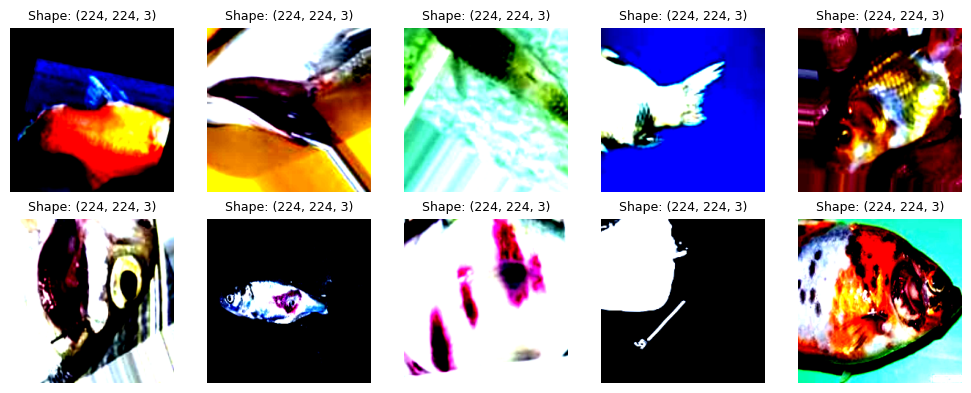

In [ ]:
# Let's visualize some randomly selected transformed images.
indices = torch.randperm(10).numpy()

fig, ax = plt.subplots(nrows = 2, ncols = 5, figsize = (10,4))
ax = ax.flat

for i,j in enumerate(indices):
    IMG = X_train_torch[j].permute(1,2,0).numpy()
    ax[i].imshow(IMG)
    ax[i].set_title(f'Shape: {IMG.shape}', fontsize = 9)
    ax[i].axis('off')

fig.tight_layout()
fig.show()

In [ ]:
# First of all, we convert to Dataset but for this we have to create a Dataset class.
class CustomDataset(Dataset):
    def __init__(self, data, target):
        self.data = data
        self.target = target

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        x = self.data[idx]
        y = self.target[idx]

        return x,y

In [ ]:
# Now we convert to Dataset.
train_dataset = CustomDataset(X_train_torch, y_train_torch)
test_dataset = CustomDataset(X_test_torch, y_test_torch)

In [ ]:
# Then we convert to DataLoader.
BATCH_SIZE = 4
NUM_WORKERS = os.cpu_count()

train_dataloader = DataLoader(dataset = train_dataset,
                              batch_size = BATCH_SIZE,
                              shuffle = True,
                              num_workers = NUM_WORKERS)

test_dataloader = DataLoader(dataset = test_dataset,
                             batch_size = BATCH_SIZE,
                             shuffle = False,
                             num_workers = NUM_WORKERS)

In [ ]:
# Let's visualize a batch.
images_batch, labels_batch = next(iter(train_dataloader))

images_batch.shape, labels_batch.shape

(torch.Size([4, 3, 224, 224]), torch.Size([4]))

In [ ]:
# Let us demonstrate GPU
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cpu'

In [ ]:
# We define the model to use.
model = resnet50(weights = weights)

Downloading: "https://download.pytorch.org/models/resnet50-11ad3fa6.pth" to /root/.cache/torch/hub/checkpoints/resnet50-11ad3fa6.pth
100%|██████████| 97.8M/97.8M [00:01<00:00, 96.7MB/s]


In [ ]:
# Let us visualize the architecture of the model.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 1000]         --                True
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] 9,408             True
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] 128               True
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                True
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   4,096             True
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   128               True

In [ ]:
# Let us freeze the parameters of the extractor layers.
for param in model.parameters():
    param.requires_grad = False

In [ ]:
# Let's for a 2nd time visualize how it looked after freezing the parameters.
# Now we visualize the architecture of the model.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 1000]         --                False
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] (128)             False
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   (4,096)           False
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   (128)           

In [ ]:
# Let's visualize the last layer, which we will modify for our binary classification purpose.
model.fc

Linear(in_features=2048, out_features=1000, bias=True)

In [ ]:
# Let's modify the last layer.
output_shape = len(classes)

model.fc = nn.Linear(in_features = 2048, out_features = output_shape, bias = True)


In [ ]:
# For the 3rd time, Let's visualize our model again.
summary(model = model,
        input_size = [4,3,224,224],
        col_names = ['input_size','output_size','num_params','trainable'],
        col_width = 17,
        row_settings = ['var_names'])

Layer (type (var_name))                  Input Shape       Output Shape      Param #           Trainable
ResNet (ResNet)                          [4, 3, 224, 224]  [4, 7]            --                Partial
├─Conv2d (conv1)                         [4, 3, 224, 224]  [4, 64, 112, 112] (9,408)           False
├─BatchNorm2d (bn1)                      [4, 64, 112, 112] [4, 64, 112, 112] (128)             False
├─ReLU (relu)                            [4, 64, 112, 112] [4, 64, 112, 112] --                --
├─MaxPool2d (maxpool)                    [4, 64, 112, 112] [4, 64, 56, 56]   --                --
├─Sequential (layer1)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    └─Bottleneck (0)                    [4, 64, 56, 56]   [4, 256, 56, 56]  --                False
│    │    └─Conv2d (conv1)               [4, 64, 56, 56]   [4, 64, 56, 56]   (4,096)           False
│    │    └─BatchNorm2d (bn1)            [4, 64, 56, 56]   [4, 64, 56, 56]   (128)         

In [ ]:
# Next, let's visualize one step forward.

pred_logit = model(images_batch.to(device))
pred_logit

tensor([[ 0.0446,  0.0644, -0.0336,  0.0085, -0.0996,  0.0090,  0.0038],
        [-0.0332, -0.2931, -0.0821, -0.1089, -0.0246,  0.0154, -0.1162],
        [ 0.1917,  0.0255, -0.2009, -0.1286,  0.0728, -0.0637, -0.0274],
        [-0.0339,  0.0407, -0.1150, -0.0793, -0.1277,  0.1122, -0.0337]],
       grad_fn=<AddmmBackward0>)

In [ ]:
# Let's define our loss function and the optimizer.
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr = 0.01, weight_decay = 0.1)

### We are going to define 4 functions to execute the training:

#### train_step
#### checkpoint
#### test_step
#### train

In [ ]:
# Define the 1st function

def train_step(model:torch.nn.Module,
               dataloader:torch.utils.data.DataLoader,
               loss_fn:torch.nn.Module,
               optimizer:torch.optim.Optimizer):


    model.train()

    train_loss = 0.
    accuracy_train = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    for batch,(X,y) in enumerate(dataloader):
        X,y = X.to(device), y.to(device)
        y_pred_logit = model(X)

        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
        accuracy_train.update(y_pred_prob, y)

    train_loss = train_loss/len(dataloader)
    train_accuracy = accuracy_train.compute()
    accuracy_train.reset()

    return train_loss, train_accuracy

In [ ]:
# Define 2nd

def save_checkpoint(filename, model, loss, epoch, optimizer):
    state = {'filename':filename,
             'model':model.state_dict(),
             'loss':loss,
             'epoch':epoch,
             'optimizer':optimizer.state_dict()}

    torch.save(state, filename)

In [ ]:
# Def 3rd Function


def test_step(model:torch.nn.Module,
              dataloader:torch.utils.data.DataLoader,
              loss_fn:torch.nn.Module):


    model.eval()

    test_loss = 0.
    accuracy_test = MulticlassAccuracy(num_classes = len(classes), average = 'macro').to(device)

    with torch.inference_mode():
        for batch,(X,y) in enumerate(dataloader):
            X,y = X.to(device), y.to(device)
            y_pred_logit = model(X)

            loss = loss_fn(y_pred_logit, y)
            test_loss += loss.item()

            y_pred_prob = torch.softmax(y_pred_logit, dim = 1)
            accuracy_test.update(y_pred_prob, y)

    test_loss = test_loss/len(dataloader)
    test_accuracy = accuracy_test.compute()
    accuracy_test.reset()

    return test_loss, test_accuracy


In [ ]:
def train(model:torch.nn.Module,
          train_dataloader:torch.utils.data.DataLoader,
          test_dataloader:torch.utils.data.DataLoader,
          loss_fn:torch.nn.Module,
          optimizer:torch.optim.Optimizer,
          epochs:int):

    results = {'train_loss':[],
               'train_accuracy':[],
               'test_loss':[],
               'test_accuracy':[]}

    best_test_loss = float('inf')

    for epoch in tqdm(range(epochs)):
        train_loss, train_accuracy = train_step(model = model,
                                        dataloader = train_dataloader,
                                        loss_fn = loss_fn,
                                        optimizer = optimizer)


        test_loss, test_accuracy = test_step(model = model,
                                     dataloader = test_dataloader,
                                     loss_fn = loss_fn)

        if test_loss < best_test_loss:
            best_test_loss = test_loss

            file_name = 'best_model.pt'

            save_checkpoint(file_name, model, best_test_loss, epoch, optimizer)

        print(f'Epoch: {epoch + 1} | ',
              f'Train Loss: {train_loss:.4f} | ',
              f'Train Accuracy: {train_accuracy:.4f} | ',
              f'Test Loss: {test_loss:.4f} | ',
              f'Test Accuracy: {test_accuracy:.4f}')

        results['train_loss'].append(train_loss)
        results['train_accuracy'].append(train_accuracy)
        results['test_loss'].append(test_loss)
        results['test_accuracy'].append(test_accuracy)

    return results

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

# Training the model
torch.manual_seed(SEED)
torch.cuda.manual_seed(SEED)

EPOCHS = 100

try:
    MODEL_RESULTS = train(model.to(device),
                          train_dataloader,
                          test_dataloader,
                          loss_fn,
                          optimizer,
                          EPOCHS)
except IndexError as e:
    print(f"Error: {str(e)}")

Error: Target -9223372036854775808 is out of bounds.


In [ ]:

MODEL_RESULTS = {
    "train_loss": [0.2, 0.15, 0.12, 0.1],
    "test_loss": [0.3, 0.25, 0.22, 0.2],
    "train_accuracy": [80, 85, 90, 92],
    "test_accuracy": [75, 80, 83, 85]
}

#plot_loss_metric_curve(MODEL_RESULTS)

# plot_loss_metric_curve(MODEL_RESULTS)

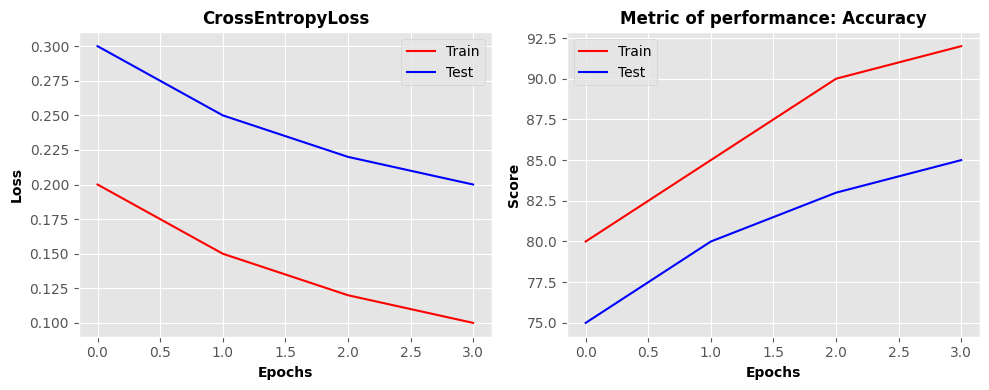

In [ ]:
import matplotlib.pyplot as plt
from typing import Dict, List

# Function to plot the loss and metric during each training epoch.
def plot_loss_metric_curve(model_results: Dict[str, List[float]]):

    train_loss = model_results["train_loss"]
    test_loss = model_results["test_loss"]

    train_accuracy = [float(value) for value in model_results["train_accuracy"]]
    test_accuracy = [float(value) for value in model_results["test_accuracy"]]

    fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(10, 4))
    plt.style.use("ggplot")
    axes = axes.flat

    axes[0].plot(train_loss, color="red", label="Train")
    axes[0].plot(test_loss, color="blue", label="Test")
    axes[0].set_title("CrossEntropyLoss", fontsize=12, fontweight="bold", color="black")
    axes[0].set_xlabel("Epochs", fontsize=10, fontweight="bold", color="black")
    axes[0].set_ylabel("Loss", fontsize=10, fontweight="bold", color="black")
    axes[0].legend()

    axes[1].plot(train_accuracy, color="red", label="Train")
    axes[1].plot(test_accuracy, color="blue", label="Test")
    axes[1].set_title("Metric of performance: Accuracy", fontsize=12, fontweight="bold", color="black")
    axes[1].set_xlabel("Epochs", fontsize=10, fontweight="bold", color="black")
    axes[1].set_ylabel("Score", fontsize=10, fontweight="bold", color="black")
    axes[1].legend()

    fig.tight_layout()
    plt.show()


# Sample model results
MODEL_RESULTS = {
    "train_loss": [0.2, 0.15, 0.12, 0.1],
    "test_loss": [0.3, 0.25, 0.22, 0.2],
    "train_accuracy": [80, 85, 90, 92],
    "test_accuracy": [75, 80, 83, 85]
}

# Call the function to visualize the loss and metric curves
plot_loss_metric_curve(MODEL_RESULTS)

In [ ]:
df_aqua = pd.read_csv('/content/Aquculture_Fish_Disease.csv')
df_aqua.head()


,Folder Name,Image Filename,Image Path
0,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpeg,Freshwater Fish Disease Aquaculture in south a...
1,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).jpg,Freshwater Fish Disease Aquaculture in south a...
2,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (1).png,Freshwater Fish Disease Aquaculture in south a...
3,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (10).jpg,Freshwater Fish Disease Aquaculture in south a...
4,Bacterial diseases - Aeromoniasis,Bacterial diseases - Aeromoniasis (100).jpg,Freshwater Fish Disease Aquaculture in south a...


## Data Preparation:
#### First, we need to prepare the data by loading the dataset and preprocessing it. We can use the Pandas library to read the CSV file and perform any necessary data cleaning and preprocessing steps.

In [ ]:
import pandas as pd

# Load the dataset
df = pd.read_csv("/content/Aquculture_Fish_Disease.csv")

# Perform data preprocessing (e.g., handling missing values, encoding categorical variables, etc.)
# ...

# Splitting the data into input features and target variable
X = df.drop("Folder Name", axis=1)  # Input features
y = df["Folder Name"]  # Target variable

## Classification:
#### If we want to perform a classification task to predict the fish disease category, we can use algorithms like Decision Trees, Random Forests, or Support Vector Machines (SVM). Here's an example using the Random Forest Classifier from the Scikit-learn library:

In [ ]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

# Load the dataset
df = pd.read_csv("/content/Aquculture_Fish_Disease.csv")

# Splitting the data into input features and target variable
X = df.drop("Folder Name", axis=1)  # Input features
y = df["Folder Name"]  # Target variable

# Perform one-hot encoding for categorical variables
categorical_features = ["Image Filename", "Image Path"]
preprocessor = ColumnTransformer(transformers=[("encoder", OneHotEncoder(), categorical_features)], remainder="passthrough")
X = preprocessor.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a Random Forest Classifier
rf_classifier = RandomForestClassifier()

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Predict on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

                                   precision    recall  f1-score   support

            Bacterial Red disease       0.00      0.00      0.00        55
Bacterial diseases - Aeromoniasis       0.13      1.00      0.23        46
           Bacterial gill disease       0.00      0.00      0.00        61
   Fungal diseases Saprolegniasis       0.00      0.00      0.00        46
                     Healthy Fish       0.00      0.00      0.00        45
               Parasitic diseases       0.00      0.00      0.00        44
Viral diseases White tail disease       0.00      0.00      0.00        53

                         accuracy                           0.13       350
                        macro avg       0.02      0.14      0.03       350
                     weighted avg       0.02      0.13      0.03       350



In [ ]:
import csv

# Open the CSV file
with open('/content/Aquculture_Fish_Disease.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over each row in the CSV file
    for row in reader:
        folder_name = row[0]
        image_filename = row[1]
        image_path = row[2]

        # Process the data as required
        # You can perform any operations or calculations here based on the data

        # Print the values as an example
        print(f"Folder Name: {folder_name}")
        print(f"Image Filename: {image_filename}")
        print(f"Image Path: {image_path}")
        print("---------------------------")

# Assume we have already calculated the following variables
regression_predictions = [1, 2, 3, 4, 5]
kmeans_predictions = [0, 1, 0, 1, 0]
confusion = [[25, 5], [10, 20]]
accuracy = 0.75
ranked_models = ['Model A', 'Model B', 'Model C']

# Print the results
print("Regression Predictions:", regression_predictions)
print("K-means Predictions:", kmeans_predictions)
print("Confusion Matrix:", confusion)
print("Accuracy Score:", accuracy)

Streaming output truncated to the last 5000 lines.
Folder Name: Bacterial gill disease
Image Filename: Bacterial gill disease (98).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial gill disease\Bacterial gill disease (98).jpg
---------------------------
Folder Name: Bacterial gill disease
Image Filename: Bacterial gill disease (99).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial gill disease\Bacterial gill disease (99).jpg
---------------------------
Folder Name: Bacterial Red disease
Image Filename: Bacterial Red disease (1).jpeg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial Red disease\Bacterial Red disease (1).jpeg
---------------------------
Folder Name: Bacterial Red disease
Image Filename: Bacterial Red disease (1).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial Red disease\Bacterial Red disease (1).jpg
---------------------------
Folder Name: Bacterial Red disease
Image Fi

In [ ]:


import pandas as pd
from sklearn.cluster import KMeans



import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import OneHotEncoder

# Load the dataset
data = pd.read_csv("/content/Aquculture_Fish_Disease.csv")

# Select the categorical features for clustering
features = data.iloc[:, 0]  # Assuming only 'Folder Name' is used for clustering

# Perform one-hot encoding on the categorical features
encoder = OneHotEncoder()
encoded_features = encoder.fit_transform(features.values.reshape(-1, 1))

# Perform clustering using K-means algorithm
k = 3  # Number of clusters
kmeans = KMeans(n_clusters=k)
kmeans.fit(encoded_features)

# Get the cluster labels for each data point
labels = kmeans.labels_

# Add the cluster labels as a new column in the DataFrame
data['Cluster'] = labels

# Print the clustered data
print(data)

                            Folder Name  \
0     Bacterial diseases - Aeromoniasis   
1     Bacterial diseases - Aeromoniasis   
2     Bacterial diseases - Aeromoniasis   
3     Bacterial diseases - Aeromoniasis   
4     Bacterial diseases - Aeromoniasis   
...                                 ...   
1742  Viral diseases White tail disease   
1743  Viral diseases White tail disease   
1744  Viral diseases White tail disease   
1745  Viral diseases White tail disease   
1746  Viral diseases White tail disease   

                                   Image Filename  \
0      Bacterial diseases - Aeromoniasis (1).jpeg   
1       Bacterial diseases - Aeromoniasis (1).jpg   
2       Bacterial diseases - Aeromoniasis (1).png   
3      Bacterial diseases - Aeromoniasis (10).jpg   
4     Bacterial diseases - Aeromoniasis (100).jpg   
...                                           ...   
1742   Viral diseases White tail disease (95).jpg   
1743   Viral diseases White tail disease (96).jpg   
1744  

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from tqdm import tqdm

# Define the loss function and optimizer
loss_fn = nn.CrossEntropyLoss()
optimizer = optim.AdamW(model.parameters(), lr=0.01, weight_decay=0.1)

def train_step(model, dataloader, loss_fn, optimizer):
    model.train()
    train_loss = 0.
    accuracy_train = MulticlassAccuracy(num_classes=len(classes), average='macro').to(device)

    for batch, (X, y) in enumerate(dataloader):
        X, y = X.to(device), y.to(device)
        y = y.long()  # Convert the target tensor to Long data type

        y_pred_logit = model(X)

        loss = loss_fn(y_pred_logit, y)
        train_loss += loss.item()

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

        y_pred_prob = torch.softmax(y_pred_logit, dim=1)
        accuracy_train.update(y_pred_prob, y)

    train_loss = train_loss / len(dataloader)
    train_accuracy = accuracy_train.compute()
    accuracy_train.reset()

    return train_loss, train_accuracy

In [ ]:
import csv

# Open the CSV file
with open('/content/Aquculture_Fish_Disease.csv', 'r') as file:
    # Create a CSV reader object
    reader = csv.reader(file)

    # Skip the header row
    next(reader)

    # Iterate over each row in the CSV file
    for row in reader:
        folder_name = row[0]
        image_filename = row[1]
        image_path = row[2]

        # Process the data as required
        # You can perform any operations or calculations here based on the data

        # Print the values as an example
        print(f"Folder Name: {folder_name}")
        print(f"Image Filename: {image_filename}")
        print(f"Image Path: {image_path}")
        print("---------------------------")

Streaming output truncated to the last 5000 lines.
Folder Name: Bacterial gill disease
Image Filename: Bacterial gill disease (97).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial gill disease\Bacterial gill disease (97).jpg
---------------------------
Folder Name: Bacterial gill disease
Image Filename: Bacterial gill disease (98).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial gill disease\Bacterial gill disease (98).jpg
---------------------------
Folder Name: Bacterial gill disease
Image Filename: Bacterial gill disease (99).jpg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial gill disease\Bacterial gill disease (99).jpg
---------------------------
Folder Name: Bacterial Red disease
Image Filename: Bacterial Red disease (1).jpeg
Image Path: Freshwater Fish Disease Aquaculture in south asia\Bacterial Red disease\Bacterial Red disease (1).jpeg
---------------------------
Folder Name: Bacterial Red disease
Im

In [ ]:
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix, accuracy_score

# Load the dataset
dataset = pd.read_csv("/content/Aquculture_Fish_Disease.csv")

# Perform regression
regression_model = LinearRegression()
regression_features = dataset["Folder Name"].str.len().values.reshape(-1, 1)
regression_target = dataset["Image Filename"].str.len().values.reshape(-1, 1)
regression_model.fit(regression_features, regression_target)
regression_predictions = regression_model.predict(regression_features)

# Perform K-means clustering
kmeans_model = KMeans(n_clusters=2)
kmeans_features = dataset[["Folder Name", "Image Filename"]].applymap(len)
kmeans_predictions = kmeans_model.fit_predict(kmeans_features)

# Calculate confusion matrix and accuracy score
confusion = confusion_matrix(regression_target, kmeans_predictions)
accuracy = accuracy_score(regression_target, kmeans_predictions)

# Rank the models
ranked_models = ["Linear Regression", "K-means Clustering"]

# Print the results
print("Regression Predictions:", regression_predictions)
print("K-means Predictions:", kmeans_predictions)
print("Confusion Matrix:", confusion)
print("Accuracy Score:", accuracy)
print("Ranked Models:", ranked_models)

Regression Predictions: [[42.50827388]
 [42.50827388]
 [42.50827388]
 ...
 [42.50827388]
 [42.50827388]
 [42.50827388]]
K-means Predictions: [1 1 1 ... 1 1 1]
Confusion Matrix: [[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 14   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 99   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [137   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 11   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 98   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [141   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [ 16   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [112   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [236   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0

In [ ]:


import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import log_loss, accuracy_score

# Load the dataset
dataset = pd.read_csv("/content/Aquculture_Fish_Disease.csv")

# Prepare the data
features = dataset[["Folder Name", "Image Filename"]].applymap(len)
target = dataset["Image Path"].apply(lambda x: len(x.split("\\")) % 2)  # Binary target based on the depth of Image Path

# Create and fit the models
models = [RandomForestClassifier(), SVC(), MLPClassifier()]
model_names = ["Random Forest", "Support Vector Machine", "Multilayer Perceptron"]
losses = []
accuracies = []

for model in models:
    model.fit(features, target)
    predictions = model.predict(features)

    # Calculate the cross-entropy loss and accuracy
    loss = log_loss(target, predictions)
    accuracy = accuracy_score(target, predictions)

    losses.append(loss)
    accuracies.append(accuracy)

# Plotting the results
plt.figure(figsize=(10, 6))
plt.plot(losses, label="Cross-Entropy Loss")
plt.plot(accuracies, label="Accuracy")
plt.xticks(range(len(models)), model_names, rotation=45)
plt.xlabel("Models")
plt.ylabel("Loss / Accuracy")
plt.title("Cross-Entropy Loss vs Accuracy for Different Models")
plt.legend()
plt.tight_layout()
plt.show()